# STAGE4 모델링



저희 팀은 모델링을 위해 트리기반의 앙상블 모델을 활용했습니다.

**앙상블(ensenble)모델**이란 여러 간단한 모델(weak classifier)의 예측 결과를 적절히 통합하여 형성하는 강한 모델(strong classifier)입니다.

앙상블 기법은 주로 배깅(bagging), 부스팅(boosting), 보팅(voting)의 방법론이 존재합니다.

**배깅**은 붓스트랩 집계(bootstrap aggregating)의 준말로 붓스트랩은 통계학에서 무작위추출(random sampling)을 뜻합니다.
기존의 데이터를 복원 무작위 추출하여 여러 **붓스트랩 샘플**을 만들고, 여러 독립된 모델로 샘플들을 학습시킨 결과를 통합합니다.
배깅은 학습 데이터가 부족할 때 활용합니다. 기존의 샘플의 편향(bias)과 분산(variance)으로 인한 과소적합(underfitting)문제 또는 과적합(overfitting)문제를 다수의 랜덤 샘플링을 통해 변동되는 분포로 대응할 수 있습니다.

**부스팅**은 여러 모델이 순차적으로 종속되어 있으며, 각각의 모델을 지나며 샘플 가중치를 학습합니다.
따라서 다음 모델은 이전 모델의 학습결과에 영향을 받으며, 부스팅은 예측 오차를 감소시키기 위해 사용합니다.
배깅과의 차이는 배깅은 독립적으로 학습시켜 통합하며, 부스팅은 순차적으로 학습시킨 결과값입니다.

**보팅**은 여러 분류모델을 통합하는 방법 중 하나입니다.
다수결의 원칙을 따르는 하드 보팅과 분류기의 확률 값의 평균을 따르는 소프트 보팅이 있습니다.

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import f1_score, accuracy_score, recall_score, roc_auc_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

### Baseline 비교

#### Random Forest; RF
의사결정나무(decision tree)와 배깅을 활용하여 만든 앙상블모델이 랜덤포레스트입니다.

여러개의 의사결정나무의 결과값을 통합하여 결과값을 계산합니다.

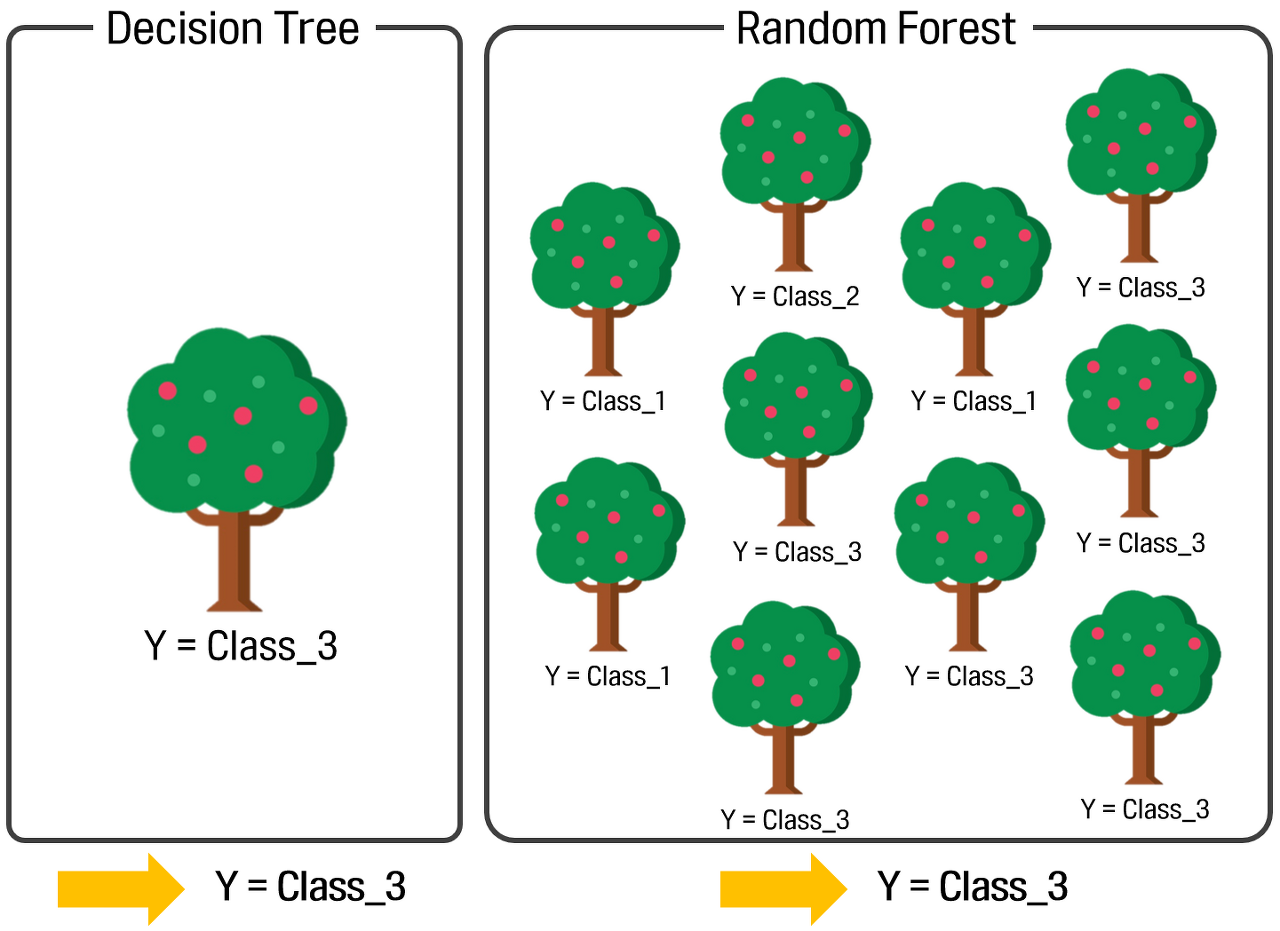

출처 : https://leehah0908.tistory.com/14

분류 모델에서는 각 트리의 결과값의 **다수결**로 최종 분류가 이루어집니다.

회귀 모델에서는 각 트리의 결과값의 **평균값**으로 최종 분류가 이루어집니다

In [ ]:
rf = RandomForestClassifier(random_state=random_state)
rf.fit(train_x, train_y)
rf.predict(valid_x)
rf_pred = rf.predict_proba(valid_x)

#### Gradient Boosting model; GBM

의사결정나무(회귀)와 부스팅을 활용하여 만든 앙상블모델이 GBM입니다.

연산량이 많아 시간이 오래 걸리지만, 대체적으로 성능이 좋은 편입니다.

In [ ]:
gbm = GradientBoostingClassifier(random_state=random_state)
gbm.fit(train_x, train_y)
gbm.predict(valid_x)
gbm_pred = gbm.predict_proba(valid_x)

#### Extreme Gradient Boosting model; XGBM

XGBM은 GBM에 규제(regularization)를 더하여 Regularized boosting으로도 불리며, 이는 더욱 강건(robust)해졌습니다.

뿐만아니라 병렬처리(parallel proocessing)를 통해 계산속도를 단축했습니다.

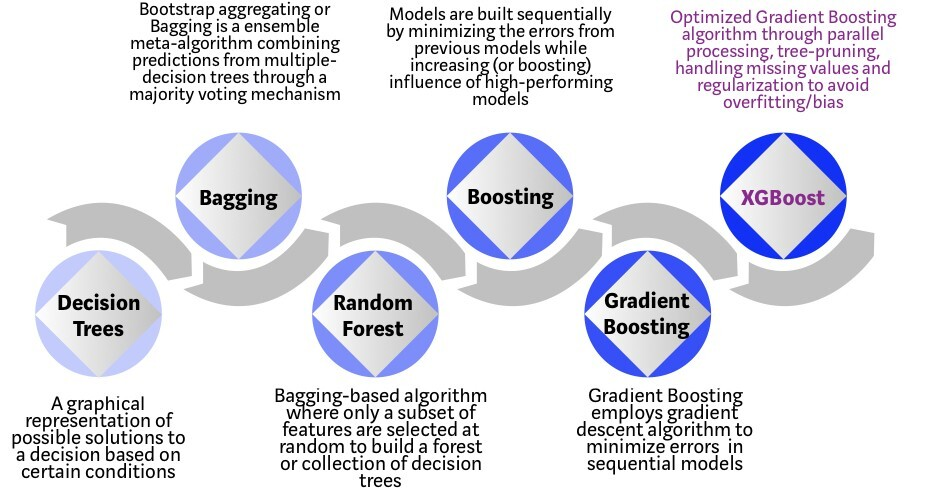

출처 : https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d


In [ ]:
xgbm = XGBClassifier(random_state=random_state)
xgbm.fit(train_x, train_y)
xgbm.predict(valid_x)
xgbm_pred = xgbm.predict_proba(valid_x)

#### Light Gradient Boosting model; LGBM

이전의 부스팅기법은 level-wise기법으로 수평으로 트리를 늘리는 것과 달리 LGBM은 수직적으로 트리를 키워나갑니다. 이를 leaf-wise라고 합니다. 

직관적으로 level-wise는 각 노드의 모든 선택지 보고 판단하며, leaf-wise는 이전 단계의 선택지만 보고 판단합니다.

그렇기 때문에 학습시간이 비교적 짧으며 메모리 사용량도 적은 편이며, leaf-wise방식은 과적합에 민감합니다.

또한 LGBM은 개체(object)가 1만건 이상의 큰 데이터셋에 추천됩니다.

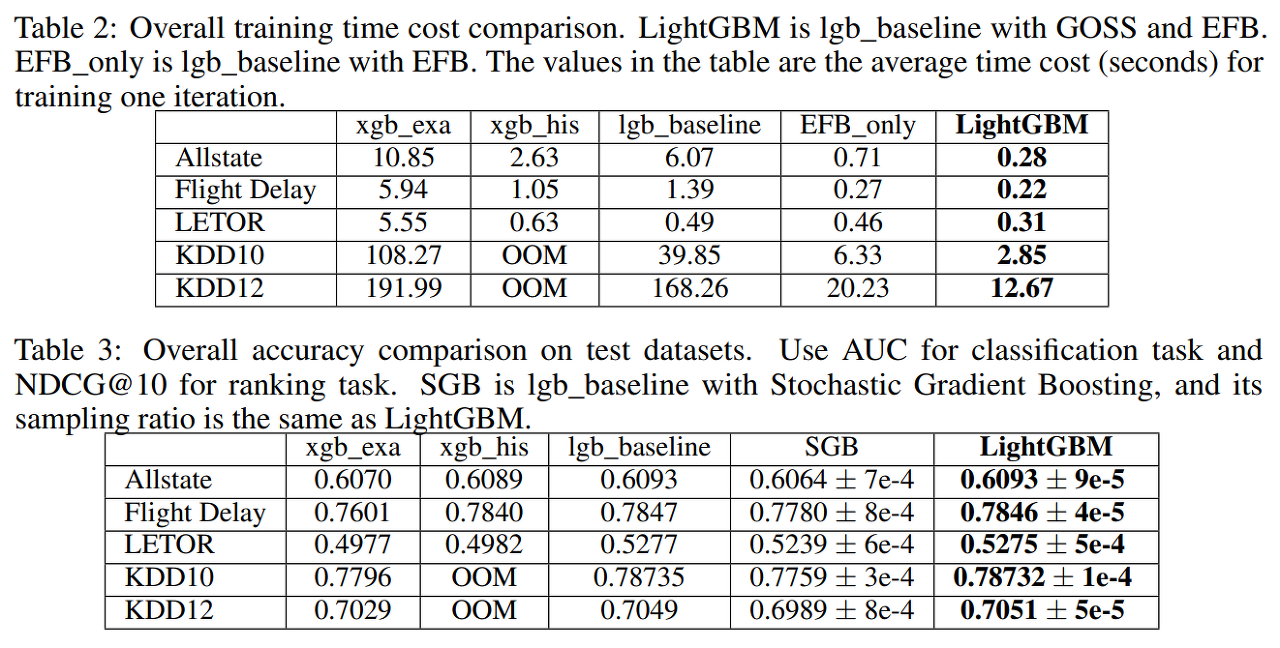

출처 : https://papers.nips.cc/paper/2017/hash/6449f44a102fde848669bdd9eb6b76fa-Abstract.html

Ke, G., Meng, Q., Finley, T., Wang, T., Chen, W., Ma, W., ... & Liu, T. Y. (2017). Lightgbm: A highly efficient gradient boosting decision tree. Advances in neural information processing systems, 30.


위 표를 볼때, 다른 알고리즘에 비해서 압도적으로 속도적인 우위를 가지고 있는것을 알 수 있습니다.

In [ ]:
lgbm = LGBMClassifier(random_state=random_state)
lgbm.fit(train_x, train_y)
lgbm.predict(valid_x)
lgbm_pred = lgbm.predict_proba(valid_x)

#### K-Nearst Neighbors; KNN

KNN은 지도학습 분류모델입니다.

K-최근접이웃은 "유유상종"입니다. 유유상종: 비슷한 특성이나 속성을 가진 것들끼리 가깝게 모여있습니다.

KNN은 유클리디안 거리(euclidean distance)를 기반으로 데이터로부터 거리가 가까운 K개의 데이터를 같은 클래스로 분류합니다.

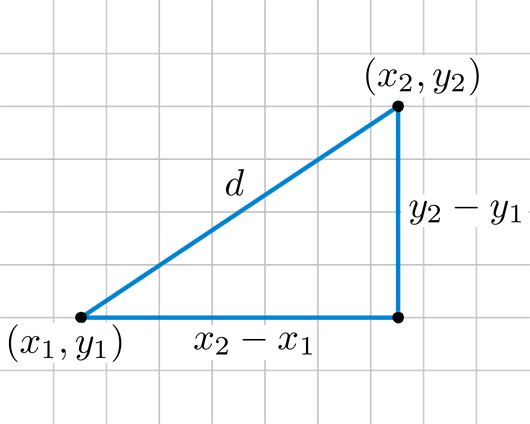

유클리디안 거리란?

직각 삼각형의 d변을 구하는 방법과 같습니다.

출처 : https://needjarvis.tistory.com/454

In [ ]:
# Kneighbors
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(train_x, train_y)
knn.predict(valid_x)
knn_pred = knn.predict_proba(valid_x)

In [ ]:
models = [gbm, xgbm, lgbm, rf, knn]
models_name = ['GBM','XGBM','LGBM','RF','KNN']

In [ ]:
# check by model 
for model, name in zip(models, models_name):
    print('##########',name,'##############################')
    print(f'정확도: {accuracy_score(valid_y, model.predict(valid_x)) * 100:.4f}%')
    print(f'재현율: {recall_score(valid_y, model.predict(valid_x),pos_label=1) * 100:.4f}%')
    print(f'F1_score: {f1_score(valid_y, model.predict(valid_x)) * 100:.4f}%')
    print(f'ROC_AUC: {roc_auc_score(valid_y, model.predict(valid_x)) * 100:.4f}%')
    print('')
# 정확도(KNN), 재현율(KNN), F1_score(KNN), ROC_AUC(GBM)
# 현재 결과로는 XGBM = LGBM = RF

########## GBM ##############################
정확도: 92.2222%
재현율: 96.4706%
F1_score: 95.9064%
ROC_AUC: 58.2353%

########## XGBM ##############################
정확도: 93.3333%
재현율: 98.8235%
F1_score: 96.5517%
ROC_AUC: 49.4118%

########## LGBM ##############################
정확도: 93.3333%
재현율: 98.8235%
F1_score: 96.5517%
ROC_AUC: 49.4118%

########## RF ##############################
정확도: 93.3333%
재현율: 98.8235%
F1_score: 96.5517%
ROC_AUC: 49.4118%

########## KNN ##############################
정확도: 90.0000%
재현율: 95.2941%
F1_score: 94.7368%
ROC_AUC: 47.6471%



### Soft Voting

저희팀은 소프트 보팅을 시도했습니다.

소프트 보팅은 다수의 분류 모델의 예측 확률의 평균 값이 가장 높은 레이블 값을 최종 결과값으로 선정하는 방법입니다.

In [ ]:
# Soft Voting
# 비교적 성능이 좋은 KNN과 GBM 그리고 1가지 모델을 선정

cols = list()
for n, m in enumerate(models):
    if n == 0:
        temp1 = pd.DataFrame(m.predict_proba(valid_x)[:,1])
    else:
        temp2 = pd.DataFrame(m.predict_proba(valid_x)[:,1])
        temp1 = pd.concat([temp1, temp2], axis=1)
ensemble = pd.DataFrame(temp1)
ensemble.columns = models_name
ensemble  = ensemble[['GBM','RF','KNN']] ## 보팅모델선택
ensemble['Prob'] = ensemble.sum(axis=1)/len(ensemble.columns) # 예측 확률 값 평균
for i in [round(a,4) for a in np.linspace(0.1,0.9, 100)]:
  print(i,'#############################')
  threshold = i # check 
  ensemble['OC'] = 0
  ensemble.loc[ensemble['Prob']>threshold,'OC'] = 1

  valid_pred_y = np.array(ensemble['OC']).copy()
  print(f'정확도: {accuracy_score(valid_y, valid_pred_y) * 100:.4f}%')
  print(f'재현율: {recall_score(valid_y, valid_pred_y,pos_label=1) * 100:.4f}%')
  print(f'F1_score: {f1_score(valid_y, valid_pred_y) * 100:.4f}%')
  print(f'ROC_AUC: {roc_auc_score(valid_y, valid_pred_y) * 100:.4f}%')

# gbm + xgbm + knn -> Trheshold를 조절하며 성능향상 가능성, !오버피팅에 주의하자!
# threshold = 0.5929, 0.601, ...,0.6901 
# 정확도는 KNN과 같은 수준이며, GBM의 ROC_AUC 큰폭으로 향상

0.1 #############################
정확도: 94.4444%
재현율: 100.0000%
F1_score: 97.1429%
ROC_AUC: 50.0000%
0.1081 #############################
정확도: 94.4444%
재현율: 100.0000%
F1_score: 97.1429%
ROC_AUC: 50.0000%
0.1162 #############################
정확도: 94.4444%
재현율: 100.0000%
F1_score: 97.1429%
ROC_AUC: 50.0000%
0.1242 #############################
정확도: 94.4444%
재현율: 100.0000%
F1_score: 97.1429%
ROC_AUC: 50.0000%
0.1323 #############################
정확도: 94.4444%
재현율: 100.0000%
F1_score: 97.1429%
ROC_AUC: 50.0000%
0.1404 #############################
정확도: 94.4444%
재현율: 100.0000%
F1_score: 97.1429%
ROC_AUC: 50.0000%
0.1485 #############################
정확도: 94.4444%
재현율: 100.0000%
F1_score: 97.1429%
ROC_AUC: 50.0000%
0.1566 #############################
정확도: 94.4444%
재현율: 100.0000%
F1_score: 97.1429%
ROC_AUC: 50.0000%
0.1646 #############################
정확도: 94.4444%
재현율: 100.0000%
F1_score: 97.1429%
ROC_AUC: 50.0000%
0.1727 #############################
정확도: 94.4444%
재현율: 100.0000%
F1_score: 

### Auto ML by pycaret

Auto ML은 자동화된 머신러닝을 뜻합니다. 전문가없는 모델링(머신러닝, 딥러닝)을 하기위해서 탄생했습니다.

학습데이터와 하이퍼파라미터를 설정하면 자동으로 데이터를 분석하며, 모델 튜닝과 모델별 성능평가까지 해줍니다.

원문보기: https://www.itworld.co.kr/news/129362#csidx9a6e5ff2c7a54648e9dbdfba2c21881 

저희 팀은 Dacon의 코드공유를 참고한 결과로 pycaret이라는 AutoML 라이브러리가 많이 사용된다는 것을 알게되었고,

실습을 진행했지만, 주피터 라이트에서 pycaret이 지원되지 않습니다. 따라서 모델링을 하는 하나의 방법론으로 참고해주시면 감사하겠습니다.

In [ ]:
# data setting
# train = train_save.copy()
# test = test_save.copy()

In [ ]:
# !pip install pycaret

#### 전체 모델 둘러보기

In [ ]:
# 만약 아래의 코드 에러발생, numpy or scikit-learn 에러 발생 시

# !pip install numpy
# !pip install scikit-learn==0.23.2

# 설치 후 런타임 초기화해주세요.

In [ ]:

# from pycaret.classification import *
# exp_clf101 = setup(data = train,
#                    target='OC', # target
#                    session_id=0, # random_seed
#                    normalize=True,
#                    normalize_method='robust', # robust scaler
#                    fold_strategy='stratifiedkfold', # -> 6 STAGE
#                    ) # already preprocess the label encoding, one-hot encoding 


,Description,Value
0,session_id,0
1,Target,OC
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(298, 85)"
5,Missing Values,False
6,Numeric Features,58
7,Categorical Features,26
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='OC',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy=...
                                                  target='OC')),
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'pa

In [ ]:
# best_model = compare_models() # best: gbm(accu: 0.9662, prec: 0.9712, auc: 0.9168)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9712,0.9066,1.0000,0.9712,0.9851,0.5000,0.5000,0.462
et,Extra Trees Classifier,0.9521,0.8022,1.0000,0.9521,0.9754,0.1000,0.1000,0.176
lr,Logistic Regression,0.9474,0.6942,0.9850,0.9610,0.9726,0.2188,0.2278,0.401
knn,K Neighbors Classifier,0.9471,0.6189,1.0000,0.9471,0.9728,0.0000,0.0000,0.023
rf,Random Forest Classifier,0.9471,0.8413,1.0000,0.9471,0.9728,0.0000,0.0000,0.370
dummy,Dummy Classifier,0.9471,0.5000,1.0000,0.9471,0.9728,0.0000,0.0000,0.011
lightgbm,Light Gradient Boosting Machine,0.9421,0.6792,0.9947,0.9469,0.9701,-0.0053,-0.0053,0.139
dt,Decision Tree Classifier,0.9419,0.7346,0.9692,0.9699,0.9691,0.4454,0.4489,0.018
nb,Naive Bayes,0.9376,0.6647,0.9900,0.9466,0.9675,-0.0068,-0.0073,0.016
ridge,Ridge Classifier,0.9324,0.0000,0.9695,0.9602,0.9642,0.1934,0.2060,0.019


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
# final_model = finalize_model(best_model)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
              

In [ ]:
# test the test set
# test = test_save.copy()
# test_y = test.pop('OC')
# test_x = test.copy()
# prediction = predict_model(final_model, data = test_x)
# print(np.array(prediction['Score']))
# output = {0, 1}

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading l

[0.9992 0.7044 0.7448 0.9992 0.9988 0.9988 0.9994 0.9992 0.9962 0.9976
 0.5507 0.9831 0.9981 0.7099 0.9989 0.9989 0.9992 0.9994 0.9785 0.9982
 0.9503 0.9996 0.6862 0.9955 0.998  0.9996 0.9986 0.9952 0.9991 0.9994
 0.9993 0.9996 0.9978 0.9992 0.9995 0.9997 0.9992 0.9996 0.9993 0.9998
 0.9523 0.9997 0.9989 0.9983 0.9934 0.997  0.998  0.999  0.95   0.9995
 0.9992 0.9995 0.9892 0.9995 0.9996 0.9991 0.9985 0.9992 0.9948 0.9993
 0.9754 0.9995 0.9988 0.9963 0.9997 0.999  0.9991 0.9875 0.9973 0.9992
 0.999  0.9929 0.9929 0.9996 0.9997 0.9995 0.9994 0.9974 0.8633 0.9991
 0.9972 0.9997 0.973  0.9892 0.5953 0.9958 0.9996 0.9989 0.9782 0.9891
 0.9994 0.9976 0.9998 0.9946 0.9998 0.9997 0.9995 0.9993 0.9995 0.9961
 0.9992 0.9996 0.9968 0.9998 0.9766 0.9996 0.9949 0.9993 0.9992 0.999
 0.9984 0.999  0.9936 0.9936 0.9994 0.9995 0.9995 0.9973 0.9997 0.9993
 0.9829 0.9946 0.7279 0.9915 0.9499 0.6229 0.961 ]


In [ ]:
# # Auto ML BEST 
# # Public: 0.921, Private: 0.906
# score= list() # automl best model 'gbm'
# threshold = 0.97 # 0.97
# for i in np.array(prediction['Score']):
#     if i > threshold:
#         score.append(1) # open
#     else:
#         score.append(0) # close
# # display(np.array(score))

#### Auto ML의 hyperparams에 의한 GBM

In [ ]:
# # Gradient - automl hyperparmeters
# automl_params_gbm = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
#                            learning_rate=0.1, loss='deviance', max_depth=3,
#                            max_features=None, max_leaf_nodes=None,
#                            min_impurity_decrease=0.0, min_impurity_split=None,
#                            min_samples_leaf=1, min_samples_split=2,
#                            min_weight_fraction_leaf=0.0, n_estimators=100,
#                            n_iter_no_change=None, presort='deprecated',
#                            random_state=0, subsample=1.0, tol=0.0001,
#                            validation_fraction=0.1, verbose=0,
#                            warm_start=False)

# automl_params_gbm.fit(train_x, train_y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
# for model, name in zip([gbm, automl_params_gbm], ['gbm','automl_params_gbm']):
#     print('##########',name,'##############################')
#     print(f'정확도: {accuracy_score(valid_y, model.predict(valid_x)) * 100:.4f}%')
#     print(f'재현율: {recall_score(valid_y, model.predict(valid_x),pos_label=1) * 100:.4f}%')
#     print(f'F1_score: {f1_score(valid_y, model.predict(valid_x)) * 100:.4f}%')
#     print(f'ROC_AUC: {roc_auc_score(valid_y, model.predict(valid_x)) * 100:.4f}%')
#     print('')
# # 사실 automl의 hyperparameters는 기본값(default)입니다.

########## gbm ##############################
정확도: 92.2222%
재현율: 96.4706%
F1_score: 95.9064%
ROC_AUC: 58.2353%

########## automl_params_gbm ##############################
정확도: 92.2222%
재현율: 96.4706%
F1_score: 95.9064%
ROC_AUC: 58.2353%



In [ ]:
# # Baseline + Auto ML BEST HyperPrams
# # Public: 0.937, Private: 0.906
# test = test_save.copy()
# test_y = test.pop('OC')
# test_x = test.copy()
# test_x = rscaler.transform(test_x)
# score = list()
# threshold = 0.97 # 0.97
# for prob in automl_params_gbm.predict_proba(test_x)[:,1]:
#   if prob > threshold:
#     score.append(1)
#   else:
#     score.append(0)
# # np.array(score)

#### Auto ML의 보팅기법(blend)

In [ ]:
# # 첫번째 방법automl_gbc = create_model('gbc')
# best5 = compare_models(n_select=5)
# blend_model1 = blend_models(best5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9524,1.0000,1.0,0.9524,0.9756,0.0,0.0
1,0.9524,0.9500,1.0,0.9524,0.9756,0.0,0.0
2,0.9524,0.8000,1.0,0.9524,0.9756,0.0,0.0
3,0.9524,1.0000,1.0,0.9524,0.9756,0.0,0.0
4,0.9524,1.0000,1.0,0.9524,0.9756,0.0,0.0
5,1.0000,1.0000,1.0,1.0000,1.0000,1.0,1.0
6,0.9524,0.4500,1.0,0.9524,0.9756,0.0,0.0
7,0.9048,0.9474,1.0,0.9048,0.9500,0.0,0.0
8,0.9500,0.9474,1.0,0.9500,0.9744,0.0,0.0


INFO:logs:create_model_container: 29
INFO:logs:master_model_container: 29
INFO:logs:display_container: 4
INFO:logs:VotingClassifier(estimators=[('gbc',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='deviance',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
        

In [ ]:
# # 두번째 방법
# belnding_list = list()
# for m in ['gbc','lr','knn']: # 블렌딩 모델선택
#   temp = create_model(m) # 각 모델 구현
#   tuned_temp = tune_model(temp)
#   belnding_list.append(temp)
# blend_model2 = blend_models(estimator_list = belnding_list)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9524,1.0000,1.0,0.9524,0.9756,0.0,0.0
1,0.9524,0.9500,1.0,0.9524,0.9756,0.0,0.0
2,0.9524,0.9000,1.0,0.9524,0.9756,0.0,0.0
3,0.9524,0.9500,1.0,0.9524,0.9756,0.0,0.0
4,0.9524,1.0000,1.0,0.9524,0.9756,0.0,0.0
5,1.0000,1.0000,1.0,1.0000,1.0000,1.0,1.0
6,0.9524,0.1500,1.0,0.9524,0.9756,0.0,0.0
7,0.9048,0.8421,1.0,0.9048,0.9500,0.0,0.0
8,0.9500,1.0000,1.0,0.9500,0.9744,0.0,0.0


INFO:logs:create_model_container: 36
INFO:logs:master_model_container: 36
INFO:logs:display_container: 11
INFO:logs:VotingClassifier(estimators=[('gbc',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='deviance',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
       

# 마무리



이번 Stage에서 배운 다양한 방법을 활용하여 데이터를 전처리하는 방법은 다른 대회에서도 유용하게 응용할 수 있을 것입니다.

따라서 ‘병원 개/폐업 분류 예측 경진대회🏥’뿐만 아니라 다른 주제의 대회에서도 이번 stage가 큰 도움이 될 것이라 기대합니다. 😉

데이커 여러분 잘 따라오셨나요. 그럼 다음 stage에서 뵙겠습니다.. 🎉